In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv("./data/nyt1.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [3]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104], dtype=int64)

In [4]:
data.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [6]:
data[data.Age == 0].groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106


<AxesSubplot:>

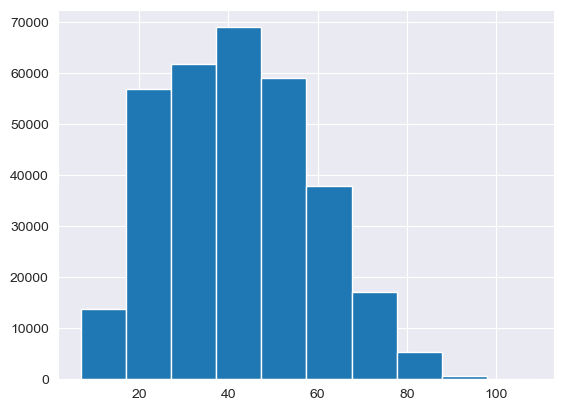

In [7]:
data_no_null_age = data[(data.Age > 0)]
data_no_null_age.Age.hist()

In [8]:
data_no_null_age.Signed_In.unique()

array([1], dtype=int64)

In [9]:
def extract_age_group(age):
    match age:
        case x if x < 18:
            return "0-18"
        case x if 18 <= x <= 24:
            return "18-24"
        case x if 25 <= x <= 34:
            return "25-34"
        case x if 35 <= x <= 44:
            return "35-44"
        case x if 45 <= x <= 54:
            return "45-54"
        case x if 55 <= x <= 64:
            return "55-64"
        case x if x >= 65:
            return "65+"


def extract_gender(gender):
    if gender == 0:
        return "Female"
    else:
        return "Male"


data_by_groups = data_no_null_age
data_by_groups['AgeGroup'] = data_no_null_age.Age.apply(lambda row: extract_age_group(row))
data_by_groups = data_by_groups.sort_values(by=['AgeGroup'])
data_by_groups

C:\Users\misha\AppData\Local\Temp\ipykernel_35588\1525061811.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_groups['AgeGroup'] = data_no_null_age.Age.apply(lambda row: extract_age_group(row))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
126116,14,0,6,1,1,0-18
88789,16,0,5,1,1,0-18
27364,13,0,4,0,1,0-18
258237,16,1,9,1,1,0-18
176132,16,0,3,1,1,0-18
...,...,...,...,...,...,...
59722,76,1,5,0,1,65+
110034,66,0,7,0,1,65+
425908,66,0,6,0,1,65+
425939,73,0,5,0,1,65+


<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

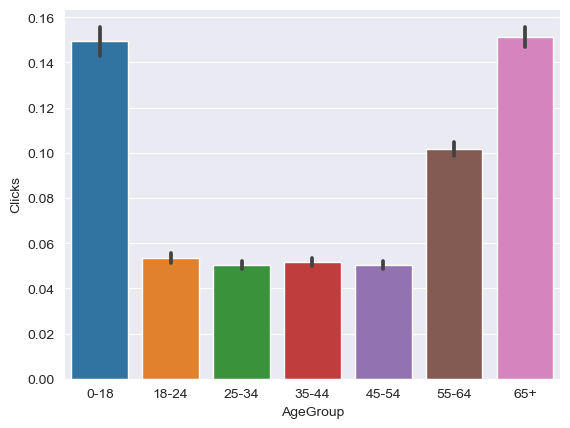

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_by_groups, x=data_by_groups.AgeGroup, y=data_by_groups.Clicks)

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

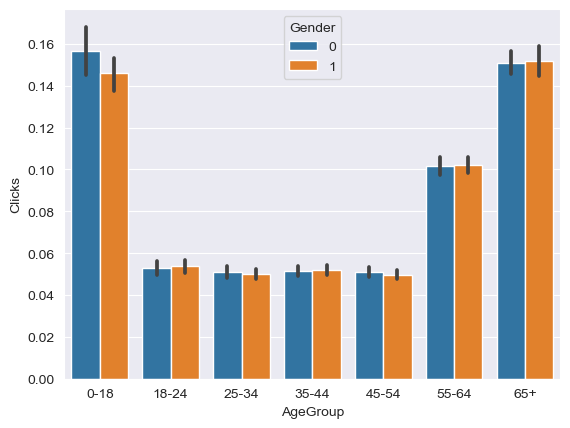

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_by_groups,
                x=data_by_groups.AgeGroup,
                y=data_by_groups.Clicks,
                hue=data_by_groups.Gender)

In [12]:
data_ctr = data_by_groups.groupby('AgeGroup', as_index=False).sum()
data_ctr['CTR'] = data_ctr.Clicks / data_ctr.Impressions
data_ctr

,AgeGroup,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,0-18,211045,9470,69239,2065,13828,0.029824
1,18-24,847791,21721,203585,2167,40694,0.010644
2,25-34,1716328,30958,290511,2937,58174,0.010110
3,35-44,2798593,37676,355824,3662,70860,0.010292
4,45-54,3181779,34007,322109,3232,64288,0.010034
5,55-64,2661830,23988,224688,4556,44738,0.020277
6,65+,2098644,10445,144120,4350,28753,0.030183


<AxesSubplot:xlabel='AgeGroup', ylabel='CTR'>

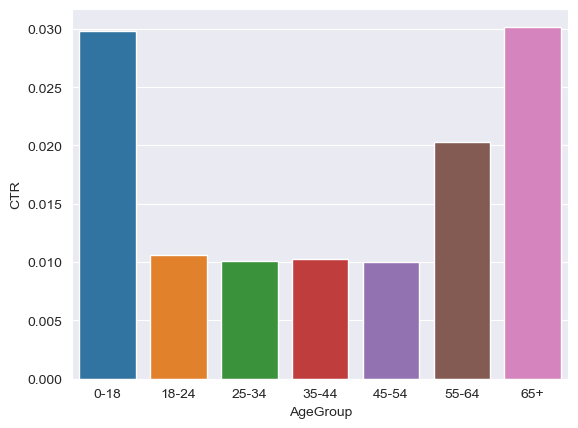

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
seaborn.barplot(data=data_ctr,
                x=data_ctr.AgeGroup,
                y=data_ctr.CTR)

In [14]:
lab_data = data_by_groups[data_by_groups.Age > 18].drop(columns="Signed_In")
lab_data

,Age,Gender,Impressions,Clicks,AgeGroup
420819,21,1,5,0,18-24
202699,23,0,7,0,18-24
345979,21,0,7,0,18-24
420672,21,0,4,0,18-24
68882,19,0,4,0,18-24
...,...,...,...,...,...
59722,76,1,5,0,65+
110034,66,0,7,0,65+
425908,66,0,6,0,65+
425939,73,0,5,0,65+


In [15]:
lab_data["Gender"] = lab_data.Gender.apply(lambda row: extract_gender(row))
lab_data['CTR'] = lab_data.Clicks / lab_data.Impressions
lab_data

,Age,Gender,Impressions,Clicks,AgeGroup,CTR
420819,21,Male,5,0,18-24,0.0
202699,23,Female,7,0,18-24,0.0
345979,21,Female,7,0,18-24,0.0
420672,21,Female,4,0,18-24,0.0
68882,19,Female,4,0,18-24,0.0
...,...,...,...,...,...,...
59722,76,Male,5,0,65+,0.0
110034,66,Female,7,0,65+,0.0
425908,66,Female,6,0,65+,0.0
425939,73,Female,5,0,65+,0.0


In [16]:
lab_data.groupby('AgeGroup').CTR.mean()

AgeGroup
18-24    0.009720
25-34    0.010146
35-44    0.010286
45-54    0.009958
55-64    0.020307
65+      0.029803
Name: CTR, dtype: float64

In [17]:
result_data = lab_data.groupby("AgeGroup").mean()
result_data = result_data.drop(columns="Age")
result_data.rename(columns={"Impressions": "Impressions mean", "Clicks": "Clicks mean"}, inplace=True)
result_data

,Impressions mean,Clicks mean,CTR
AgeGroup,,,
18-24,5.006635,0.048455,0.009720
25-34,4.993829,0.050486,0.010146
35-44,5.021507,0.051679,0.010286
45-54,5.010406,0.050274,0.009958
55-64,5.022308,0.101837,0.020307
65+,5.012347,0.151289,0.029803


<AxesSubplot:xlabel='AgeGroup'>

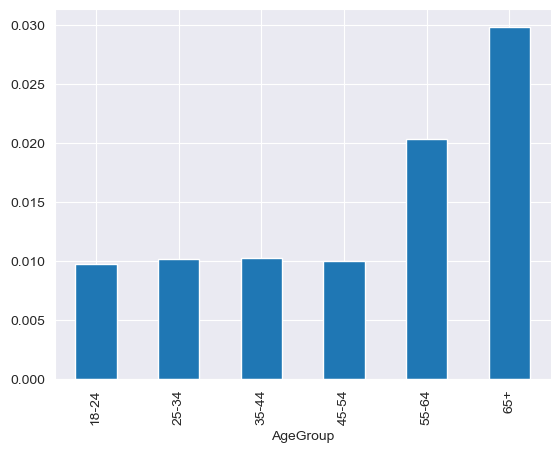

In [18]:
result_data.CTR.plot(kind="bar")

<AxesSubplot:xlabel='AgeGroup'>

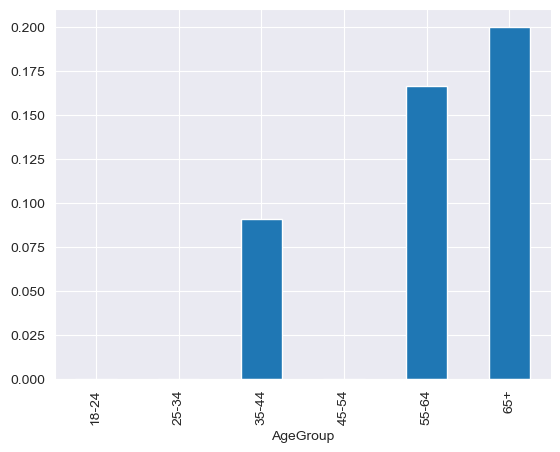

In [19]:
result_data["CTRQuantile"] = lab_data.groupby("AgeGroup").CTR.quantile(q=0.95)
result_data.CTRQuantile.plot(kind="bar")

<AxesSubplot:xlabel='AgeGroup'>

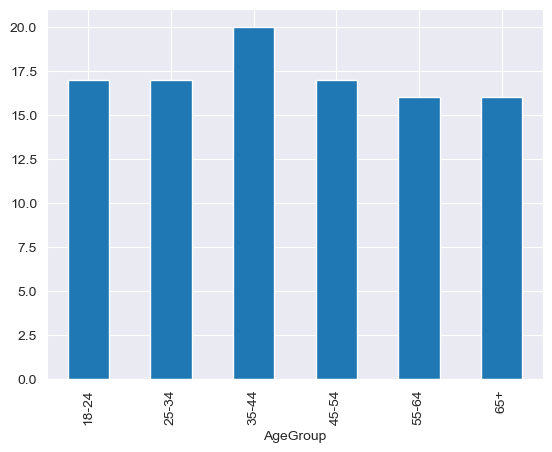

In [20]:
result_data["MaxImpressions"] = lab_data.groupby("AgeGroup").Impressions.max()
result_data["MaxImpressions"].plot(kind="bar")

<AxesSubplot:xlabel='AgeGroup'>

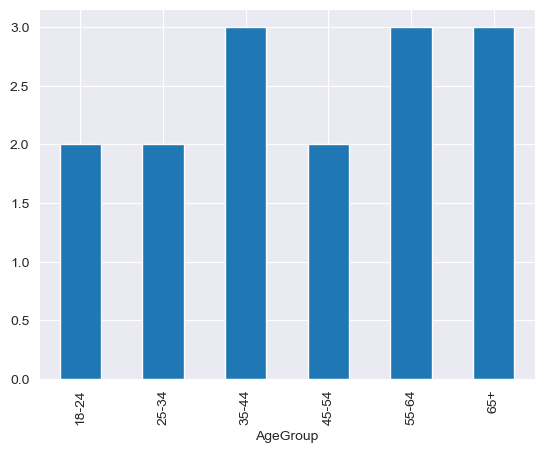

In [21]:
result_data["MaxClicks"] = lab_data.groupby("AgeGroup").Clicks.max()
result_data["MaxClicks"].plot(kind="bar")

<AxesSubplot:xlabel='AgeGroup'>

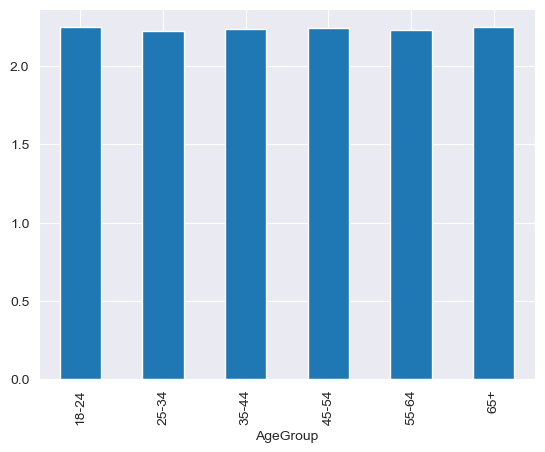

In [22]:
result_data["ImpressionsDispersion"] = lab_data.groupby("AgeGroup").Impressions.std()
result_data["ImpressionsDispersion"].plot(kind="bar")

<AxesSubplot:xlabel='AgeGroup'>

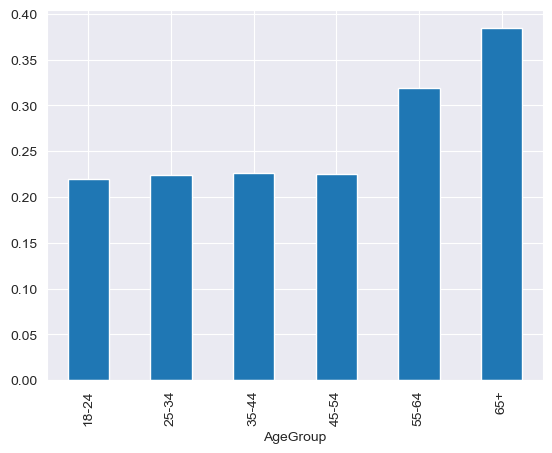

In [23]:
result_data["ClicksDispersion"] = lab_data.groupby("AgeGroup").Clicks.std()
result_data["ClicksDispersion"].plot(kind="bar")

In [24]:
def analyze_day(day):
    data_day = pd.read_csv(f"./data/nyt{day}.csv")
    data_day_no_null_age = data_day[(data_day.Age > 0) & (data_day.Signed_In == 1)]
    grouped_age_data = data_day_no_null_age
    grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: extract_age_group(x))

    lab_data_day = grouped_age_data[grouped_age_data.Age > 18]
    lab_data_day = lab_data_day.drop(columns="Signed_In")
    lab_data_day["Gender"] = lab_data_day.Gender.apply(lambda x: extract_gender(x))
    lab_data_day["CTR"] = lab_data_day.Clicks / lab_data_day.Impressions

    result_data_day = lab_data_day.groupby("age_group").mean()
    result_data_day = result_data_day.drop(columns="Age")
    result_data_day.rename(columns={"Impressions": "Impressions mean", "Clicks": "Clicks mean"}, inplace=True)
    result_data_day["CTR quantile"] = lab_data_day.groupby("age_group").CTR.quantile(q=0.95)
    result_data_day["Impressions max"] = lab_data_day.groupby("age_group").Impressions.max()
    result_data_day["Clicks max"] = lab_data_day.groupby("age_group").Clicks.max()
    result_data_day["Impressions dispersion"] = lab_data_day.groupby("age_group").Impressions.std()
    result_data_day["Clicks dispersion"] = lab_data_day.groupby("age_group").Clicks.std()

    return result_data_day

In [25]:
analyze_day(2)

C:\Users\misha\AppData\Local\Temp\ipykernel_35588\2842792951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: extract_age_group(x))


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.986214,0.051783,0.010309,0.090909,16,3,2.248052,0.227396
25-34,5.007083,0.050230,0.010153,0.000000,18,3,2.235247,0.223983
35-44,4.987068,0.051019,0.010196,0.072802,16,3,2.226515,0.225955
45-54,4.994392,0.051227,0.010316,0.076923,17,3,2.228464,0.227166
55-64,5.020435,0.101605,0.020152,0.166667,16,3,2.240195,0.318949
65+,4.996207,0.146399,0.029019,0.200000,17,3,2.225281,0.383437


In [26]:
analyze_day(3)

C:\Users\misha\AppData\Local\Temp\ipykernel_35588\2842792951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: extract_age_group(x))


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.996505,0.050703,0.010121,0.000000,18,2,2.227506,0.226175
25-34,4.996425,0.049663,0.009916,0.000000,17,3,2.229427,0.224374
35-44,5.008378,0.050715,0.010311,0.000000,19,3,2.238517,0.225372
45-54,4.984925,0.048965,0.009949,0.000000,16,3,2.225881,0.221717
55-64,5.002101,0.099940,0.020073,0.166667,16,3,2.232905,0.314726
65+,4.986910,0.151563,0.030305,0.200000,16,4,2.236634,0.389456


In [27]:
analyze_day(4)

C:\Users\misha\AppData\Local\Temp\ipykernel_35588\2842792951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: extract_age_group(x))


,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.998862,0.049008,0.009717,0.000000,16,3,2.251371,0.221623
25-34,4.994947,0.050135,0.010148,0.000000,17,3,2.240874,0.223034
35-44,4.997100,0.050827,0.010060,0.000000,17,3,2.232983,0.225663
45-54,4.987168,0.051295,0.010065,0.083333,17,3,2.233218,0.226401
55-64,5.007956,0.100752,0.020192,0.166667,17,3,2.233261,0.317994
65+,5.029751,0.149906,0.029551,0.200000,16,3,2.234815,0.387375


C:\Users\misha\AppData\Local\Temp\ipykernel_35588\2842792951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x: extract_age_group(x))


<AxesSubplot:xlabel='age_group'>

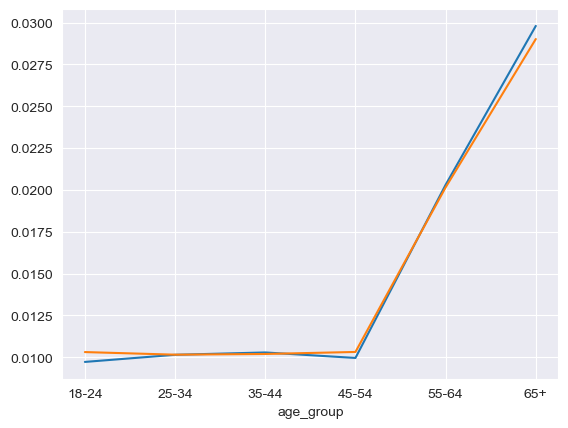

In [28]:
ax = result_data.CTR.plot()
analyze_day(2).CTR.plot(ax=ax)